[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figures 8.1, 8.5 and 8.6

Examples of two-dimensional Gaussian random vectors with different correlation coefficients between the two entries\
Topics: Correlation, Gaussian random vector

Author: Carlos Fernandez-Granda

/var/folders/1r/8drxnfc95_q25t4qy8ng2md80000gn/T/ipykernel_2917/2318942488.py:109: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4,4))


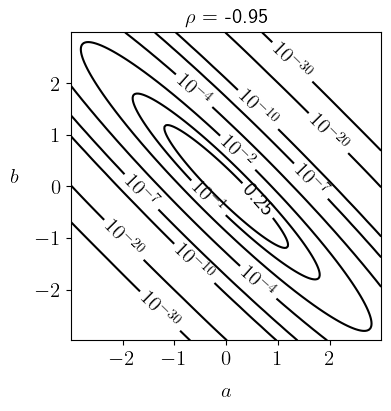

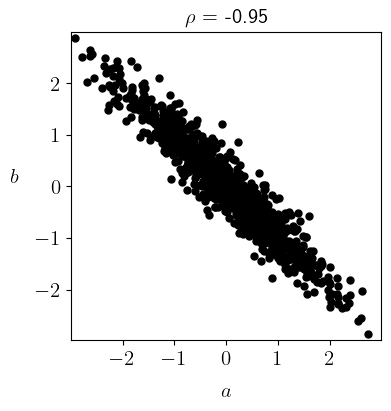

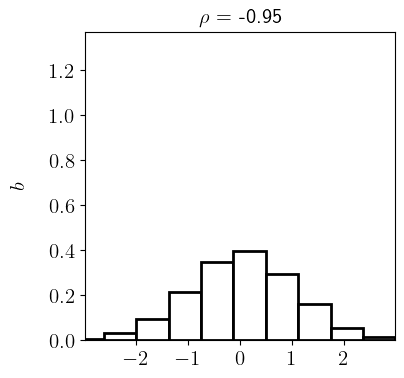

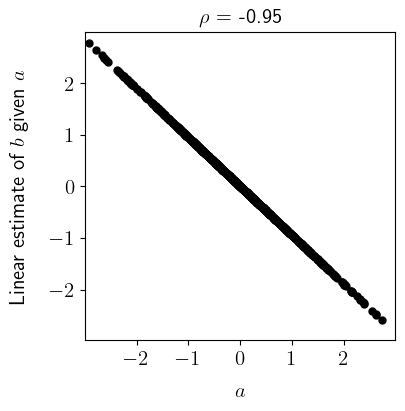

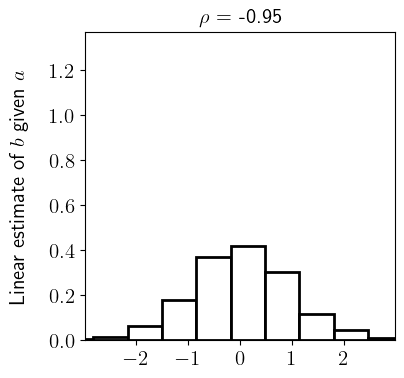

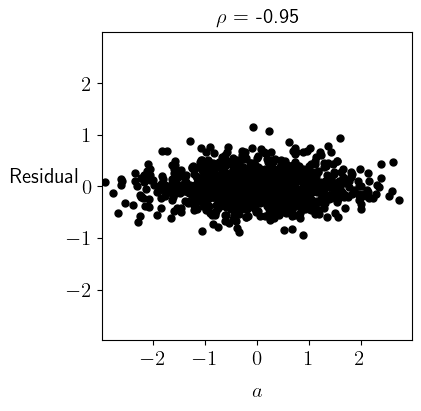

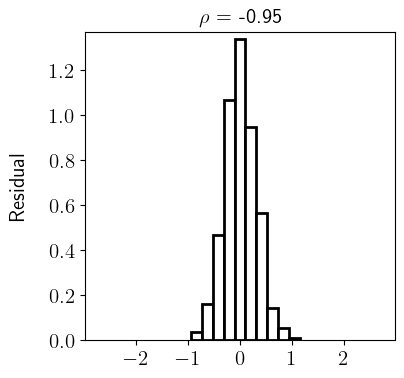

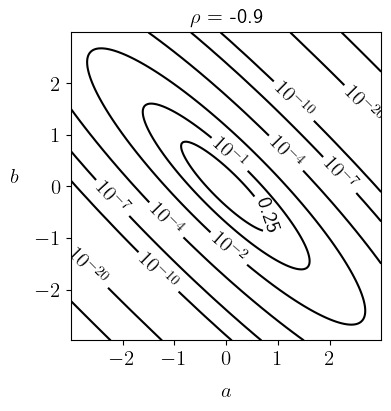

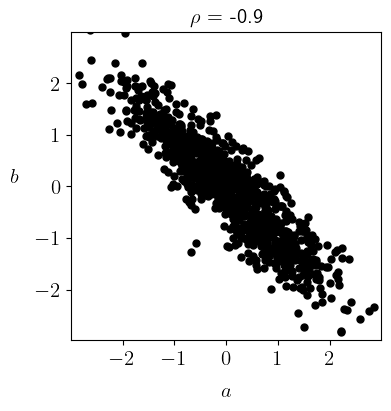

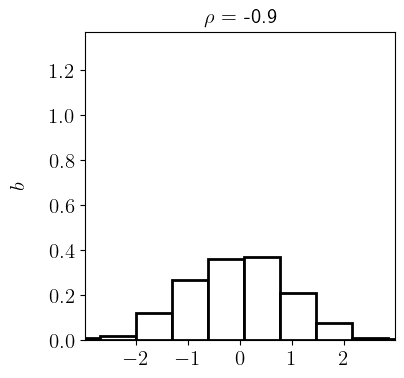

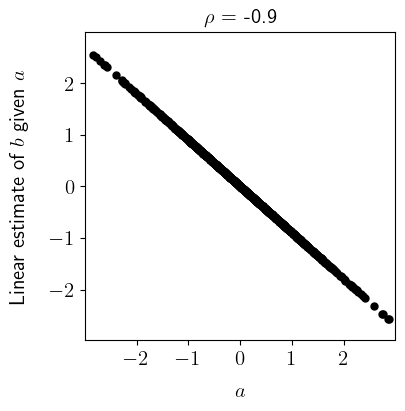

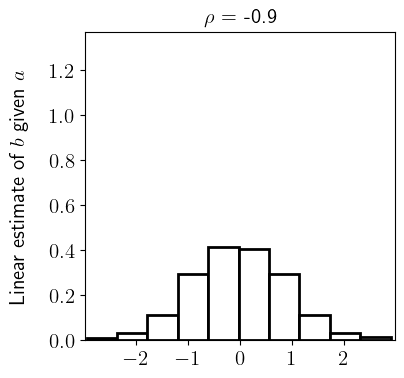

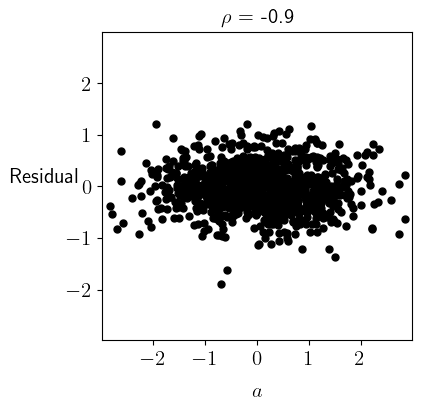

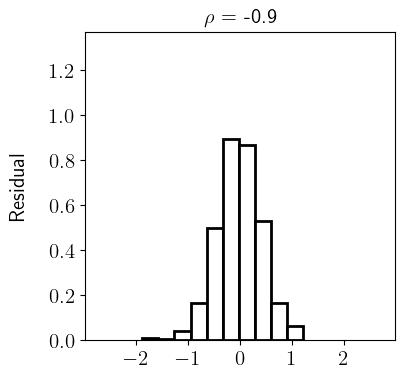

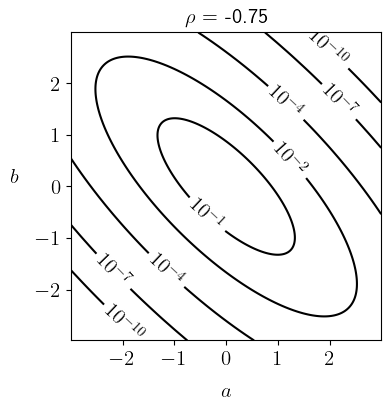

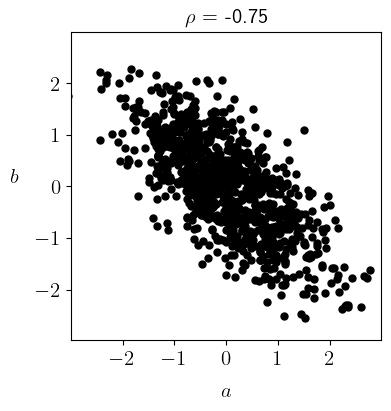

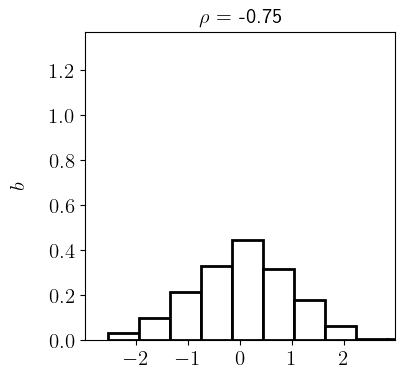

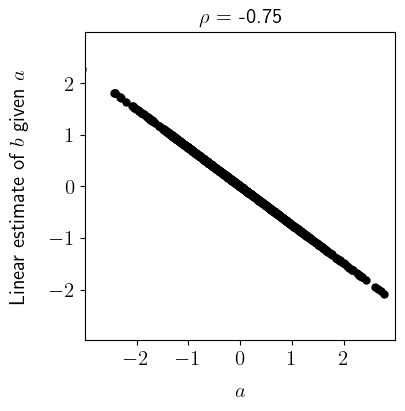

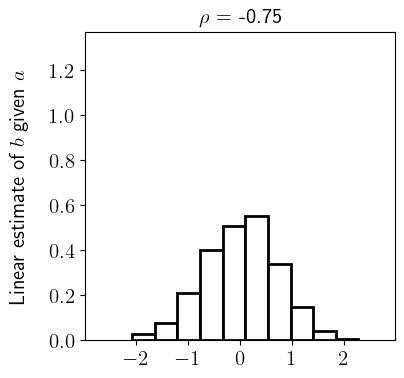

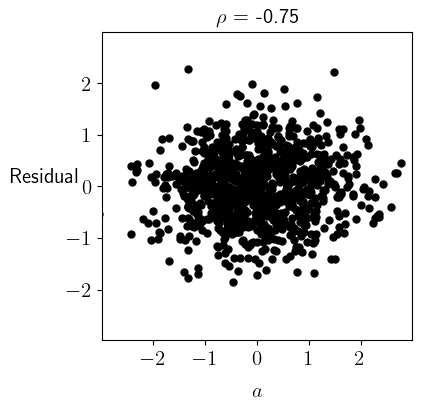

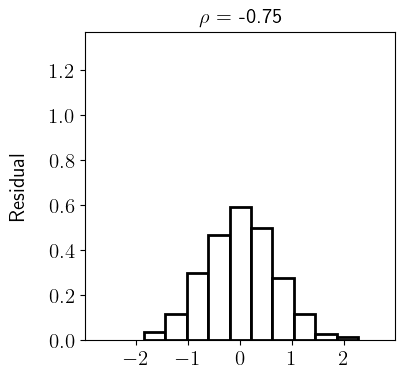

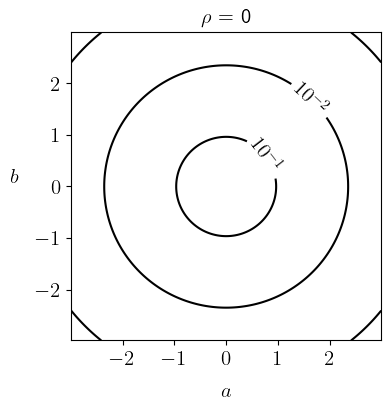

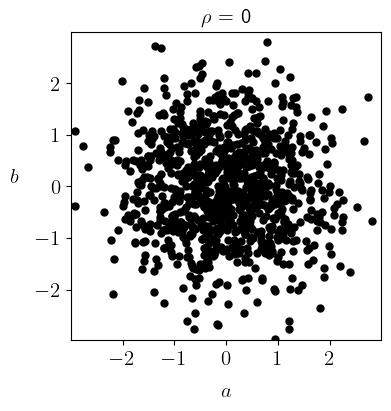

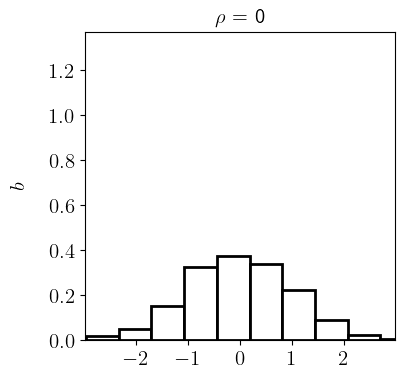

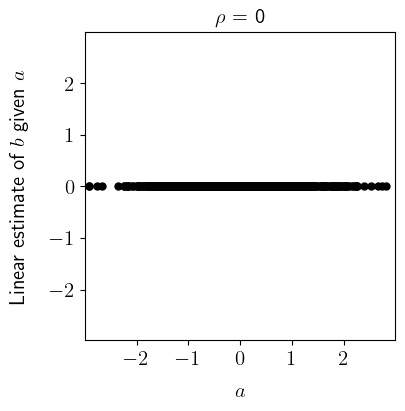

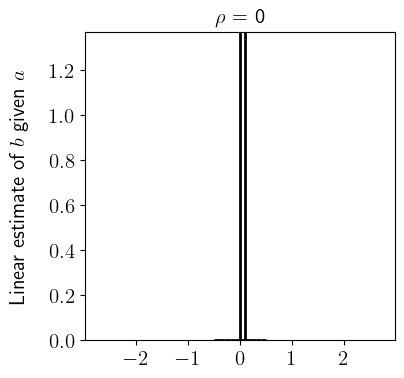

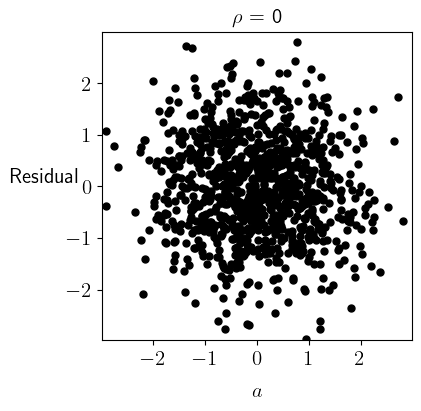

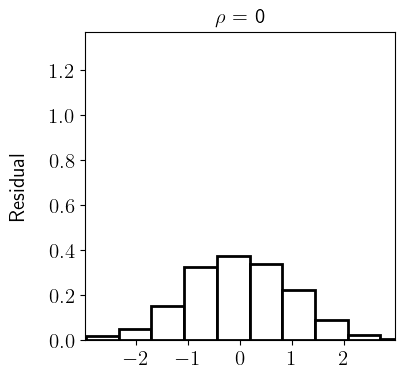

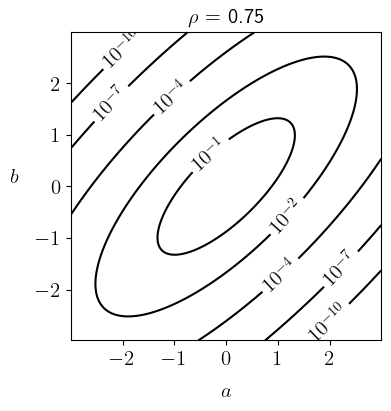

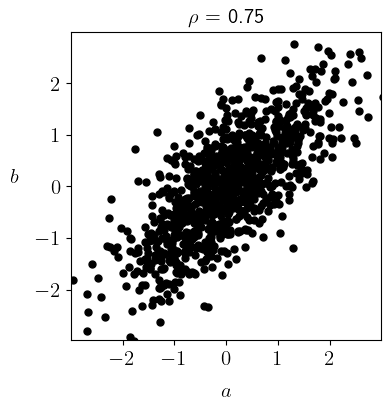

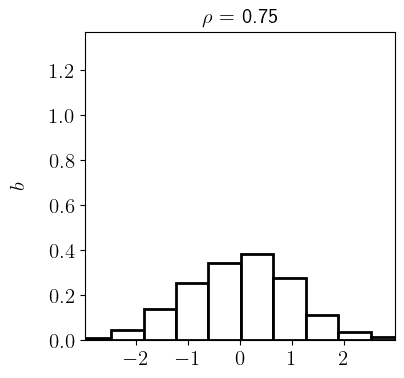

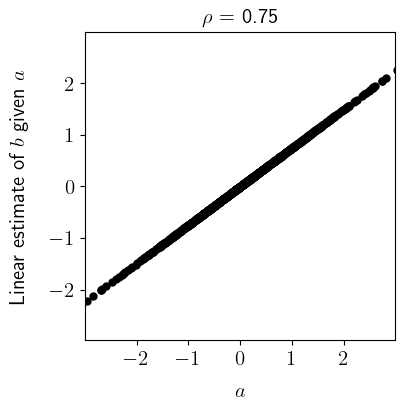

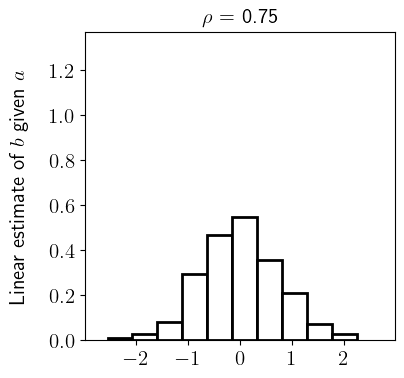

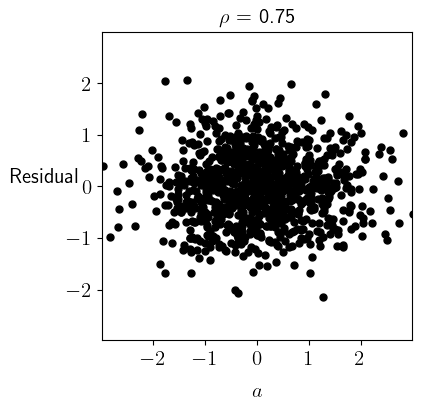

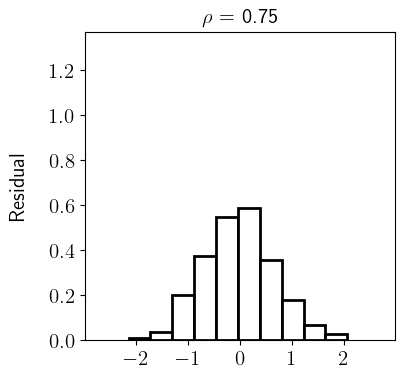

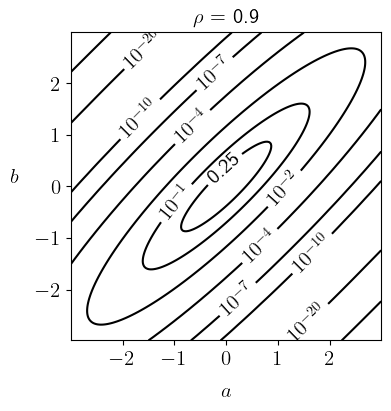

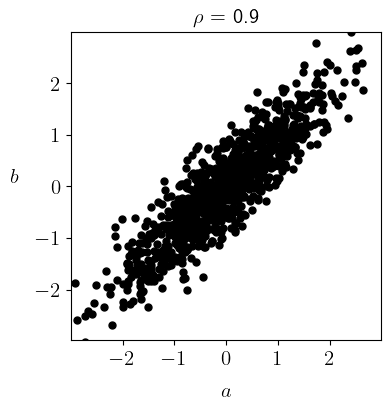

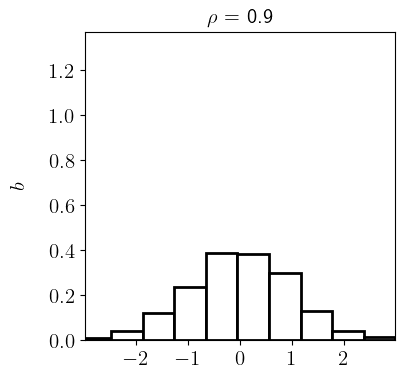

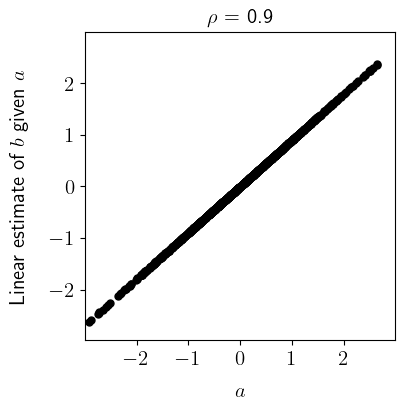

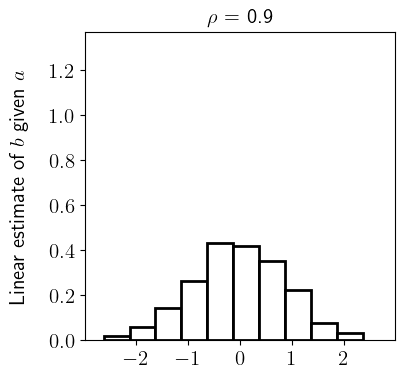

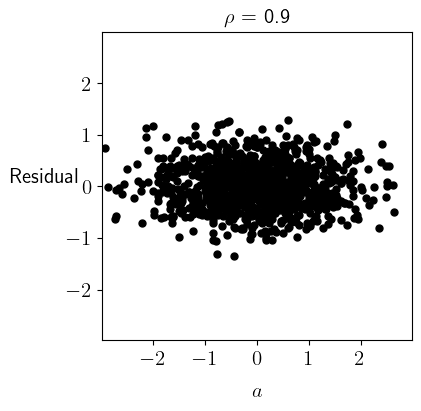

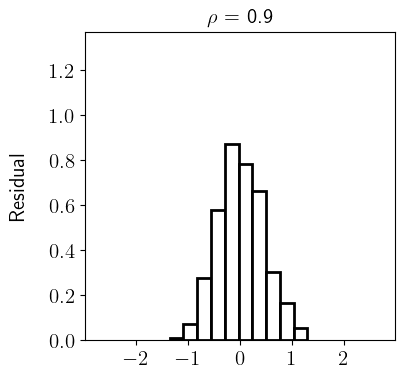

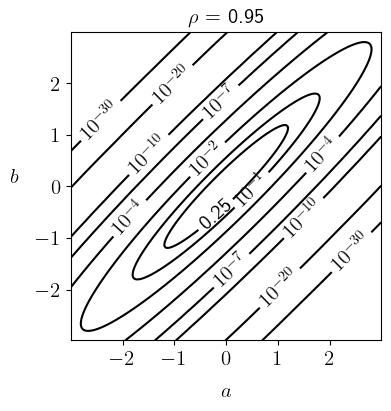

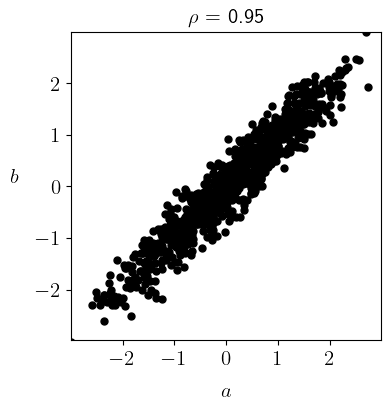

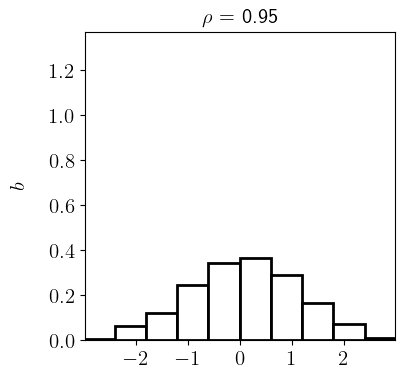

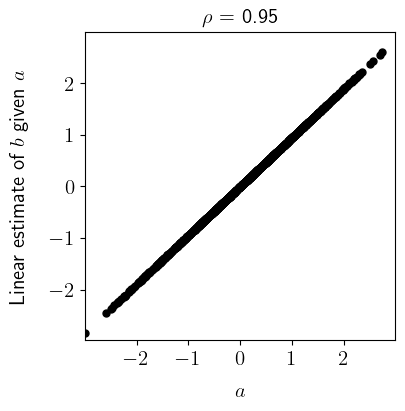

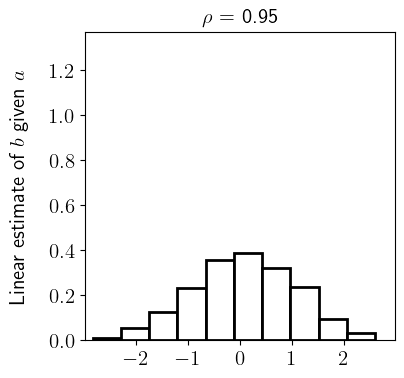

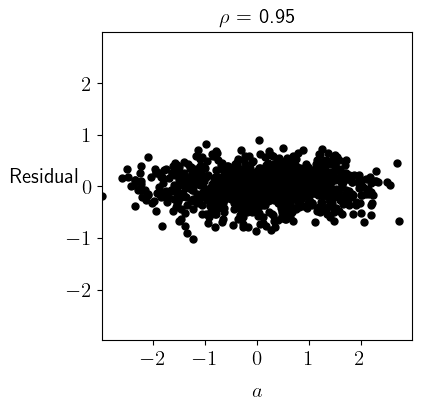

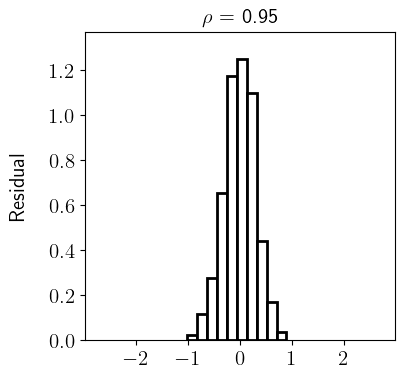

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from numpy.random import default_rng
rng = default_rng(2021)

font_size = 15
font_size_ticks = 15

xmin = -2.99
xmax = 2.99
ymin = -2.99
ymax = 2.99
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax,200)

def gaussian(x,y,rho):
    return (np.exp(-( x**2 - 2*rho*x*y + y**2)/2/(1-rho**2))
                  /(2 * np.pi * np.sqrt(1-rho**2)))

X, Y = np.meshgrid(x, y)

rho_vals = [-0.95,-0.9,-0.75,0,0.75,0.9,0.95]
level_list = [1e-30,1e-20,1e-10,1e-7,1e-4,1e-2,1e-1,0.25]
cond_val = 1.0
f_max = 0.39
n=1000
ymax_hist = 1.37
    
for ind,rho in enumerate(rho_vals):
    
    Z = gaussian(X, Y,rho)

    fig = plt.figure(figsize = (4,4)) 
    CS = plt.contour(X, Y, Z, levels = level_list,colors='black')
    fmt = {}
    strs = [r'$10^{-30}$',r'$10^{-20}$',r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$','0.25']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    plt.clabel(CS, fontsize=font_size, inline=1,fmt=fmt)
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.xlabel(r"$a$", fontsize=font_size,labelpad=10)
    h = plt.ylabel(r"$b$", fontsize=font_size,labelpad=15)
    h.set_rotation(0)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.title(r"$\rho$ = "+str(rho),fontsize=font_size)
    
    samples = rng.multivariate_normal([0,0], [[1,rho],[rho,1]], size=n)

    fig = plt.figure(figsize = (4,4)) 
    plt.plot(samples[:,0],samples[:,1],'.',ms=10,color='black',rasterized=True)
    plt.xlabel(r"$a$", fontsize=font_size,labelpad=10)
    h = plt.ylabel(r"$b$", fontsize=font_size,labelpad=15)
    h.set_rotation(0)
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.title(r"$\rho$ = "+str(rho),fontsize=font_size)
     
    plt.figure(figsize=(4,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.xlim([xmin,xmax])
    plt.hist(samples[:,1],
             color='white', edgecolor='black',
              linewidth=2,density=True)
    plt.ylim([0,ymax_hist])
    plt.title(r"$\rho$ = "+str(rho),fontsize=font_size)
    plt.ylabel(r"$b$", fontsize=font_size,labelpad=15)
    
    fig = plt.figure(figsize = (4,4)) 
    plt.plot(samples[:,0],rho*samples[:,0],'.',ms=10,color='black',rasterized=True)
    plt.xlabel(r"$a$", fontsize=font_size,labelpad=10)
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.title(r"$\rho$ = "+str(rho),fontsize=font_size)
    plt.ylabel(r"Linear estimate of $b$ given $a$", fontsize=font_size,labelpad=15)

    plt.figure(figsize=(4,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.xlim([xmin,xmax])
    plt.hist(rho*samples[:,0],#bins=n_bins,log=True,
             color='white', edgecolor='black',
              linewidth=2,density=True)
    plt.ylim([0,ymax_hist])
    plt.title(r"$\rho$ = "+str(rho),fontsize=font_size)
    plt.ylabel(r"Linear estimate of $b$ given $a$", fontsize=font_size,labelpad=15)
    
    fig = plt.figure(figsize = (4,4)) 
    plt.plot(samples[:,0],samples[:,1]-rho*samples[:,0],'.',ms=10,color='black',rasterized=True)
    plt.xlabel(r"$a$", fontsize=font_size,labelpad=10)
    h = plt.ylabel(r"$b$", fontsize=font_size,labelpad=15)
    h.set_rotation(0)
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.title(r"$\rho$ = "+str(rho),fontsize=font_size)
    plt.ylabel(r"Residual", fontsize=font_size,labelpad=15)
    
    plt.figure(figsize=(4,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.xlim([xmin,xmax])
    plt.hist(samples[:,1] - rho*samples[:,0],#bins=n_bins,log=True,
             color='white', edgecolor='black',
              linewidth=2,density=True)
    plt.ylim([0,ymax_hist])
    plt.title(r"$\rho$ = "+str(rho),fontsize=font_size)
    plt.ylabel(r"Residual", fontsize=font_size,labelpad=15)

(1000, 2)
(1000, 2)
(1000, 2)


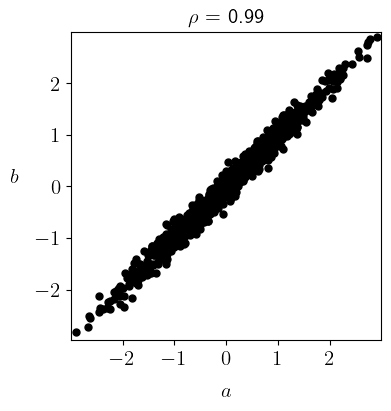

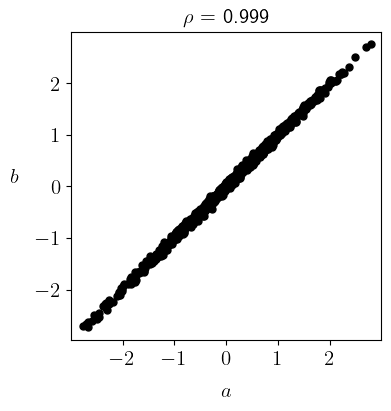

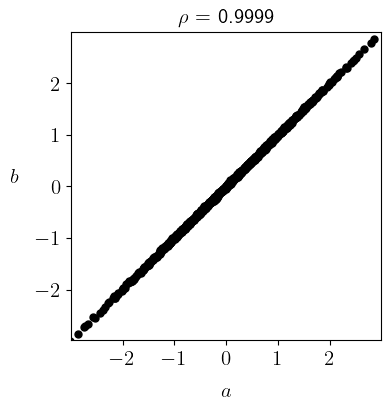

In [5]:
rho_vals = [0.99,0.999,0.9999]
n=1000

for ind,rho in enumerate(rho_vals):
    
    samples = rng.multivariate_normal([0,0], [[1,rho],[rho,1]], size=n)
    fig = plt.figure(figsize = (4,4)) 
    plt.plot(samples[:,0],samples[:,1],'.',ms=10,color='black',rasterized=True)
    plt.xlabel(r"$a$", fontsize=font_size,labelpad=10)
    h = plt.ylabel(r"$b$", fontsize=font_size,labelpad=15)
    h.set_rotation(0)
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.title(r"$\rho$ = "+str(rho),fontsize=font_size)